# Kaggle Competiton | BNP Paribas Cardif Claims Management

>As a global specialist in personal insurance, BNP Paribas Cardif serves 90 million clients in 36 countries across Europe, Asia and Latin America.
>In a world shaped by the emergence of new uses and lifestyles, everything is going faster and faster. When facing unexpected events, customers expect their insurer to support them as soon as possible. However, claims management may require different levels of check before a claim can be approved and a payment can be made. With the new practices and behaviors generated by the digital economy, this process needs adaptation thanks to data science to meet the new needs and expectations of customers.
>In this challenge, BNP Paribas Cardif is providing an anonymized database with two categories of claims:
>1. claims for which approval could be accelerated leading to faster payments
>2. claims for which additional information is required before approval

>Kagglers are challenged to predict the category of a claim based on features available early in the process, helping BNP Paribas Cardif accelerate its claims process and therefore provide a better service to its customers.

Go to the official page of the [Kaggle Competition.](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management)

### Goal for this Notebook:
In the case of this competition, we do not have previous information about the data and the different features. Therefore, in this notebook we will:
* Explore the format of data given and the format expected for the submission
* Explore the different data types in the features and when continous, if they follow a normal distribution or not
* Explore whether or not there are missing values
* Explore how to preprocess the data for a later prediction

### Required Libraries
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Sklearn
* Scipy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer
from scipy import stats

%matplotlib inline

/usr/local/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


### Handling Data
###### 1. Upload the data from the Kaggle Competition and check it out

In [2]:
train = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/train.csv")
test = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/test.csv")
sample = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/sample_submission.csv")

In [3]:
sample.head()

,ID,PredictedProb
0,0,0.5
1,1,0.5
2,2,0.5
3,7,0.5
4,10,0.5


In [4]:
train.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [5]:
test.head()

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,0,1.375465e+00,11.361141,C,4.200778,6.57700,2.081784,1.784386,0.011094,9.523810,...,7.619048,1.815241,1.112270e-07,AF,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00
1,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,I,NaN,NaN,NaN,0,NaN,NaN
2,2,-4.903407e-07,8.201529,C,4.544371,6.55010,1.558442,2.467532,0.007164,7.142858,...,5.714286,1.970928,1.412265e-02,AV,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07
3,7,2.661870e+00,3.041241,C,1.657216,9.77308,2.078337,1.430855,1.252157,7.959596,...,4.404040,8.163614,1.100329e+00,B,1.988688,1.558753,2.448814,0,5.385474,1.493777e+00
4,10,1.252822e+00,11.283352,C,4.638388,8.52051,2.302484,3.510159,0.074263,7.612904,...,6.580644,1.325654,2.584588e-01,A,1.863796,2.666478,2.374275,0,0.681672,2.264151e+00


There are missing values that need to be replaced.

It looks like there are continous features but also categorical.

###### 2. Explore Data Type by plotting and Preprocess it for later Analysis

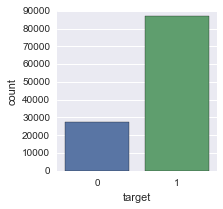

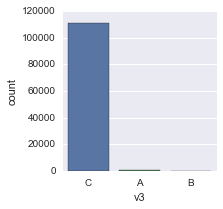

In [6]:
sns.factorplot('target',data=train,kind='count',size=3)
sns.factorplot('v3',data=train,kind='count',size=3)

   ######                   2.1. Explore Float Continous Data

In [7]:
train.loc[:, train.dtypes == np.float64].head()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v120,v121,v122,v123,v124,v126,v127,v128,v130,v131
0,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,...,1.059603,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0.636365,2.857144
1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,...,NaN,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,NaN,NaN
2,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,...,2.138728,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,0.883118,1.176472
3,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,...,1.166281,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1.677108,1.034483
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.050328,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train.loc[:, train.dtypes == np.float64].isnull().sum().sum()

4967293

If we want to replace NaN values we need to know if my data is normal distributed or not.

* Check if the continous data follows a normal or non-normal distribution

In [9]:
dist = {}
# Normalize data for each column
columns = train.columns[(train.dtypes == np.float64)]
for i in range(len(columns)):
    train.update(train[columns[i]].notnull().apply(lambda x: (x - x.mean()) / (x.max() - x.min())).dropna())
    hyp = stats.shapiro(train[columns[i]])
    if hyp[1] < 0.05:
        dist[i] = "nonnormal"
    else:
        dist[i] = "normal"
print(dist)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
/usr/local/lib/python3.5/site-packages/scipy/stats/morestats.py:1082: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{0: 'normal', 1: 'normal', 2: 'normal', 3: 'normal', 4: 'normal', 5: 'normal', 6: 'normal', 7: 'normal', 8: 'normal', 9: 'normal', 10: 'normal', 11: 'normal', 12: 'normal', 13: 'normal', 14: 'normal', 15: 'normal', 16: 'normal', 17: 'normal', 18: 'normal', 19: 'normal', 20: 'normal', 21: 'normal', 22: 'normal', 23: 'normal', 24: 'normal', 25: 'normal', 26: 'normal', 27: 'normal', 28: 'normal', 29: 'normal', 30: 'normal', 31: 'normal', 32: 'normal', 33: 'normal', 34: 'normal', 35: 'normal', 36: 'normal', 37: 'normal', 38: 'normal', 39: 'normal', 40: 'normal', 41: 'normal', 42: 'normal', 43: 'normal', 44: 'normal', 45: 'normal', 46: 'normal', 47: 'normal', 48: 'normal', 49: 'normal', 50: 'normal', 51: 'normal', 52: 'normal', 53: 'normal', 54: 'normal', 55: 'normal', 56: 'normal', 57: 'normal', 58: 'normal', 59: 'normal', 60: 'normal', 61: 'normal', 62: 'normal', 63: 'normal', 64: 'normal', 65: 'normal', 66: 'normal', 67: 'normal', 68: 'normal', 69: 'normal', 70: 'normal', 71: 'normal', 7

Since the continous features follow a normal distribution we can replace NaN values by the mean or the median for the prediction but in this case let's use the median.

For this aim we will use Imputer from Sklearn.

In [10]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(train.loc[:, train.dtypes == np.float64])
X = train.loc[:, train.dtypes == np.float64]
floatFeatures = pd.DataFrame(imp.transform(X))
floatFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,...,1.059603,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0.636365,2.857144
1,1.469550,7.023803,4.205991,9.191265,2.412790,2.452166,2.301630,9.059582,1.312910,15.495952,...,1.144708,2.436195,6.749117,2.739239,0.598896,1.614802,2.963620,1.957825,1.560138,1.589403
2,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,...,2.138728,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,0.883118,1.176472
3,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,...,1.166281,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1.677108,1.034483
4,1.469550,7.023803,4.205991,8.670867,2.412790,2.452166,0.386032,9.059582,1.050328,15.495952,...,1.144708,2.436195,6.749117,2.739239,0.139864,1.614802,2.963620,1.798436,1.560138,1.589403


###### 2.2. Explore Integers Categorical Data

In [11]:
train.loc[:, train.dtypes == np.int].head()

,ID,target,v38,v62,v72,v129
0,3,1,0,1,1,0
1,4,1,0,2,2,0
2,5,1,0,1,3,2
3,6,1,0,1,2,1
4,8,1,0,1,1,0


In [12]:
train.loc[:, train.dtypes == np.int].isnull().sum().sum()

0

Let's have a look to the categorical features.

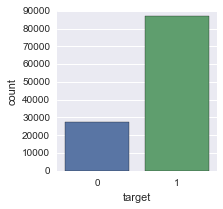

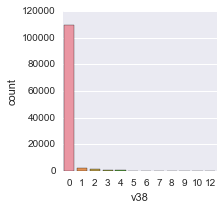

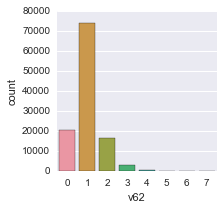

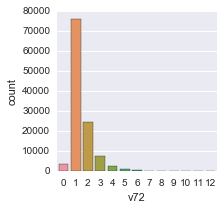

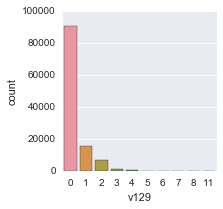

In [13]:
sns.factorplot('target',data=train,kind='count',size=3)
sns.factorplot('v38',data=train,kind='count',size=3)
sns.factorplot('v62',data=train,kind='count',size=3)
sns.factorplot('v72',data=train,kind='count',size=3)
sns.factorplot('v129',data=train,kind='count',size=3)

Convert categories in each feature a new boolean feature through OneHotEncoder of Sklearn.

In [21]:
enc = preprocessing.OneHotEncoder()
columns = train.columns[(train.dtypes == np.int)]
enc = enc.fit(train.loc[:, columns[2:]])

In [22]:
x = enc.transform(train.loc[:, columns[2:]]).toarray()
intFeatures = pd.DataFrame(x)
intFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After ploting the data we assume that the columns with integer data are categorical. After generating one feature from each category in each column we have 42 features.

###### 2.3. Explore Objects Categorical Data

In [23]:
train.loc[:, train.dtypes == np.object].head()

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,C,XDX,C,C,A,C,G,DI,C,F,B,D,E,A,E,B,O,NaN,AU
1,C,GUV,C,C,A,E,G,DY,A,F,B,D,D,B,B,A,U,G,AF
2,C,FQ,E,NaN,A,C,F,AS,A,B,B,B,E,G,C,B,S,NaN,AE
3,C,ACUE,D,C,B,C,H,BW,A,F,B,D,B,B,B,B,J,NaN,CJ
4,C,HIT,E,NaN,A,I,H,NaN,C,F,B,D,C,G,C,A,T,G,Z


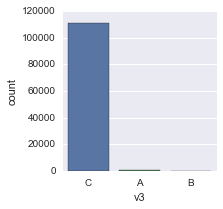

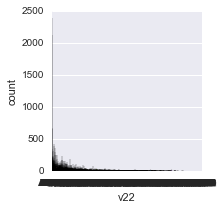

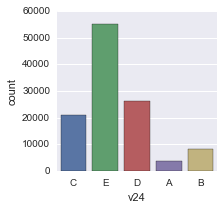

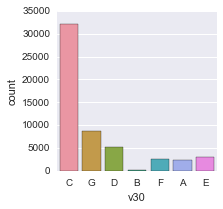

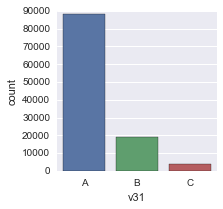

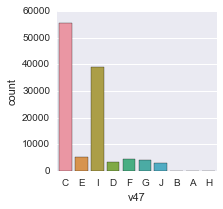

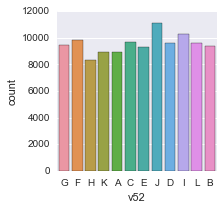

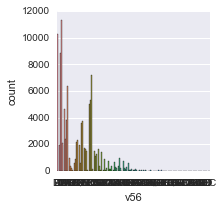

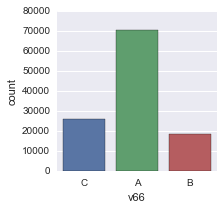

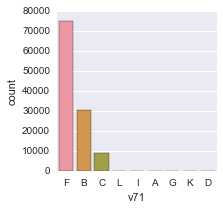

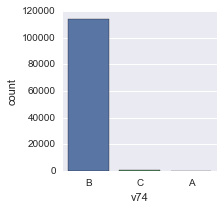

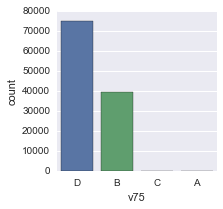

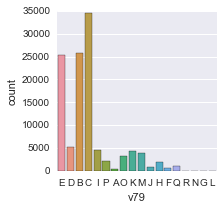

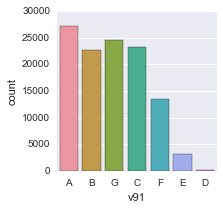

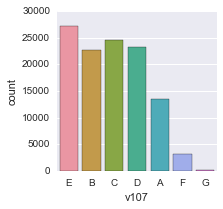

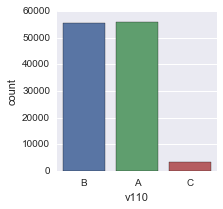

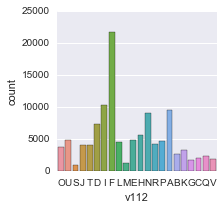

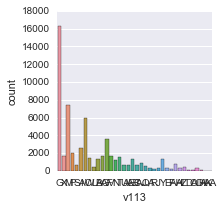

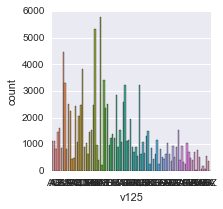

In [25]:
sns.factorplot('v3',data=train,kind='count',size=3)
sns.factorplot('v22',data=train,kind='count',size=3)
sns.factorplot('v24',data=train,kind='count',size=3)
sns.factorplot('v30',data=train,kind='count',size=3)
sns.factorplot('v31',data=train,kind='count',size=3)
sns.factorplot('v47',data=train,kind='count',size=3)
sns.factorplot('v52',data=train,kind='count',size=3)
sns.factorplot('v56',data=train,kind='count',size=3)
sns.factorplot('v66',data=train,kind='count',size=3)
sns.factorplot('v71',data=train,kind='count',size=3)
sns.factorplot('v74',data=train,kind='count',size=3)
sns.factorplot('v75',data=train,kind='count',size=3)
sns.factorplot('v79',data=train,kind='count',size=3)
sns.factorplot('v91',data=train,kind='count',size=3)
sns.factorplot('v107',data=train,kind='count',size=3)
sns.factorplot('v110',data=train,kind='count',size=3)
sns.factorplot('v112',data=train,kind='count',size=3)
sns.factorplot('v113',data=train,kind='count',size=3)
sns.factorplot('v125',data=train,kind='count',size=3)

In [26]:
train.loc[:, train.dtypes == np.object].isnull().sum().sum()

130178

The features of data type object have strings as categories and also NaN values. We will include in the pipeline the option to substitute NaN values by the most frequent feature with Imputer from Sklearn. The method will be also applied to integer categorical data since could be NaN values in the test dataset.

However, before applying Imputer, we have to change the string categories into integer categories. We have developed the class ObjtoCatStrtoIntTrans() in data_modifier.py for this aim and it would be included in the pipeline afterwards.

In [27]:
columns = train.columns[(train.dtypes == np.object)]  
for i in range(len(columns)):
    train[columns[i]] = train[columns[i]].astype('category')
    train[columns[i]] = train[columns[i]].cat.codes

In [28]:
imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
imp.fit(train[columns[:]])
X = train[columns[:]]
X.head()

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,2,16670,2,2,0,2,6,85,2,4,1,3,4,0,4,1,14,-1,21
1,2,7733,2,2,0,4,6,101,0,4,1,3,3,1,1,0,20,17,6
2,2,7086,4,-1,0,2,5,17,0,1,1,1,4,6,2,1,18,-1,5
3,2,1510,3,2,1,2,7,47,0,4,1,3,1,1,1,1,9,-1,64
4,2,8037,4,-1,0,8,7,-1,2,4,1,3,2,6,2,0,19,17,89


In [29]:
objpreFeatures = pd.DataFrame(imp.transform(X))
objpreFeatures.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2.0,16670.0,2.0,2.0,0.0,2.0,6.0,85.0,2.0,4.0,1.0,3.0,4.0,0.0,4.0,1.0,14.0,17.0,21.0
1,2.0,7733.0,2.0,2.0,0.0,4.0,6.0,101.0,0.0,4.0,1.0,3.0,3.0,1.0,1.0,0.0,20.0,17.0,6.0
2,2.0,7086.0,4.0,2.0,0.0,2.0,5.0,17.0,0.0,1.0,1.0,1.0,4.0,6.0,2.0,1.0,18.0,17.0,5.0
3,2.0,1510.0,3.0,2.0,1.0,2.0,7.0,47.0,0.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,9.0,17.0,64.0
4,2.0,8037.0,4.0,2.0,0.0,8.0,7.0,47.0,2.0,4.0,1.0,3.0,2.0,6.0,2.0,0.0,19.0,17.0,89.0


As previously, the integer categories will be transformed into new boolean features.

In [30]:
enc = preprocessing.OneHotEncoder()
enc = enc.fit(objpreFeatures)
x = enc.transform(objpreFeatures).toarray()
x

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [31]:
intFeatures = pd.DataFrame(x)
intFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,18564,18565,18566,18567,18568,18569,18570,18571,18572,18573
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


From the new boolean features we can easyly learn to build a model and thus, obtain a prediction.

In the pipeline will be included the steps descrived in the current notebook as well as the merge of the three different data types into a matrix with all the features from which we will build the model.

We will explore in the notebook gen_pipeline.ipynb every step that will be included in the pipeline.